# Examples of training the CNN using the images with stratified 5-fold cross validation  using a random 20% from each class


## requires fastai version 0.7

#### Install instructions here: https://forums.fast.ai/t/fastai-v0-7-install-issues-thread/24652

In [ ]:
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from random import sample
from itertools import chain
from sklearn.metrics import confusion_matrix
from itertools import chain
from random import sample


#### set some variables and set your GPU if you have multiple

In [15]:
torch.cuda.set_device(0)   ### use first GPU if you have many
PATH = "data/data_rmsalt_rmol2/pics/" ### path to where your pictures are downloaded and the .csv files with val sets
sz = 224  ### resize images to this px by px
arch = resnext101_64  ### pre-trained network choice
bs = 200   ### batch size for minibatches

## functions


In [ ]:

def get_val_cv_byclass(label_csv):
    label_df = pd.read_csv(label_csv)
    val_idxs = []
    for x in label_df['class'].unique(): ### should be class but reversed column labels
        start= label_df.index[label_df['class'] == x].tolist()[0]
        end = start+len(label_df.index[label_df['class'] == x].tolist())-1
        n_sample= int(round((end-start)*0.2,0))
        val_idxs.append(random.sample(range(start,end),n_sample))
    val_idxs = list(chain.from_iterable(val_idxs))
    return val_idxs

def get_val_idx_fromfile(validx_csv):
    validx_df =pd.read_csv(validx_csv, header=None)
    return validx_df[0].tolist()
    
def get_data(sz, bs, val_idxs, label_csv): # sz: image size, bs: batch size
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv,
                                       val_idxs=val_idxs, suffix='.png', tfms=tfms, bs=bs, num_workers=3)
    return data if sz > 300 else data.resize(340, 'tmp')


### 3-class, 5-fold cross validation, no data augmentation, precomputed activations

In [ ]:
label_csv = f'{PATH}3cls_rmsaltol.csv'
#n = len(list(open(label_csv))) - 1
vacc =[]
reps=5
start=0
bs=200
valididx_base = '3cls_val_ids'

for rep in range(reps):
    print(rep+start)
    val_idxs = get_val_idx_fromfile(f'{PATH}'+valididx_base+str(rep+start)+'.csv')
    data = get_data(sz, bs, val_idxs, label_csv)
    learn = ConvLearner.pretrained(arch, data, precompute=True)
    val_loss, val_acc = learn.fit(1e-2, 10, cycle_len=1, cycle_mult=2)
    vacc.append(val_acc)
print('3 class average, cyclic learning')
print(np.mean(vacc))
print(np.std(vacc))

[[0.85 0.03 0.12]                            
 [0.11 0.68 0.2 ]
 [0.08 0.07 0.85]]


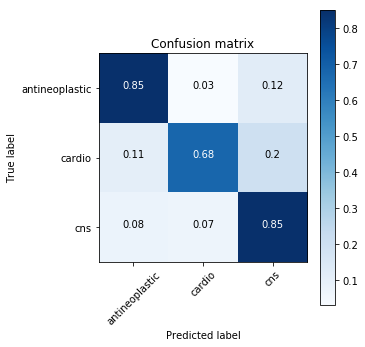

In [10]:
### plot confusion matrix showing per-class predictions
plt.rcParams['figure.figsize'] = [5, 5] ### size of the picture
log_preds,y = learn.TTA()  ### perform predictions and save the output
probs = np.mean(np.exp(log_preds),0)
preds = np.argmax(probs, axis=1)
probs = probs[:,1]
cm = confusion_matrix(y, preds)
adj = cm.transpose()/cm.sum(axis=1)
adj = adj.round(2)
plot_confusion_matrix(adj.transpose(), data.classes)

### 5-class, 5-fold cross validation, no data augmentation, precomputed activations

In [ ]:
label_csv = f'{PATH}5cls_rmsaltol.csv'
#n = len(list(open(label_csv))) - 1
vacc =[]
reps=5
start=0
bs=200
valididx_base = '5cls_val_ids'

for rep in range(reps):
    print(rep+start)
    val_idxs = get_val_idx_fromfile(f'{PATH}'+valididx_base+str(rep+start)+'.csv')
    data = get_data(sz, bs, val_idxs, label_csv)
    learn = ConvLearner.pretrained(arch, data, precompute=True)
    val_loss, val_acc = learn.fit(1e-2, 10, cycle_len=1, cycle_mult=2)
    vacc.append(val_acc)
print('5 class average, cyclic learning')
print(np.mean(vacc))
print(np.std(vacc))

[[0.88 0.05 0.03 0.04 0.01]                  
 [0.17 0.72 0.04 0.05 0.02]
 [0.1  0.06 0.71 0.12 0.01]
 [0.1  0.06 0.07 0.75 0.02]
 [0.16 0.08 0.06 0.08 0.63]]


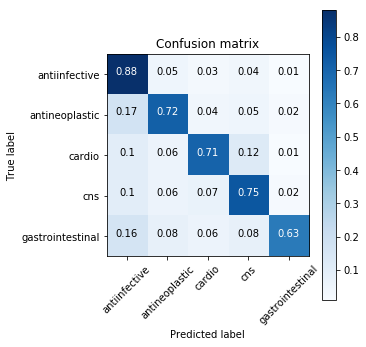

In [12]:
#### plot confusion matrix
plt.rcParams['figure.figsize'] = [5, 5]
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
preds = np.argmax(probs, axis=1)
probs = probs[:,1]
cm = confusion_matrix(y, preds)
adj = cm.transpose()/cm.sum(axis=1)
adj = adj.round(2)
plot_confusion_matrix(adj.transpose(), data.classes)

### 12-class, 5-fold cross validation, no data augmentation, precomputed activations

In [13]:
label_csv = f'{PATH}12cls_rmsaltol.csv'
#n = len(list(open(label_csv))) - 1
vacc =[]
reps=5
start=0
bs=200
valididx_base = '12cls_val_ids'

for rep in range(reps):
    print(rep+start)
    val_idxs = get_val_idx_fromfile(f'{PATH}'+valididx_base+str(rep+start)+'.csv')
    data = get_data(sz, bs, val_idxs, label_csv)
    learn = ConvLearner.pretrained(arch, data, precompute=True)
    val_loss, val_acc = learn.fit(1e-2, 10, cycle_len=1, cycle_mult=2)
    vacc.append(val_acc)
print('12 class average, cyclic learning')
print(np.mean(vacc))
print(np.std(vacc))

0



100%|██████████| 7/7 [00:11<00:00,  1.67s/it]


epoch      trn_loss   val_loss   accuracy                 
    0      2.394817   1.939126   0.429704  
    1      2.037991   1.591171   0.497477                 
    2      1.801648   1.537022   0.51478                  
    3      1.666862   1.438405   0.529921                 
    4      1.525738   1.369943   0.554434                 
    5      1.422856   1.343253   0.557318                 
    6      1.349367   1.338509   0.55876                  
    7      1.309214   1.317043   0.565249                 
    8      1.260007   1.25724    0.591925                 
    9      1.206036   1.250956   0.586878                 
    10     1.153347   1.217566   0.607787                 
    11     1.107026   1.203983   0.611391                 
    12     1.065985   1.188797   0.612833                 
    13     1.03037    1.183124   0.615717                 
    14     1.01171    1.18142    0.614996                 
    15     1.019363   1.181124   0.612112                 
    16     1

   136     0.226076   1.114832   0.749099                  
   137     0.22421    1.140555   0.736121                 
   138     0.223464   1.146563   0.732516                  
   139     0.216297   1.143585   0.736121                  
   140     0.212889   1.137873   0.736121                  
   141     0.209286   1.171468   0.738284                  
   142     0.206161   1.164005   0.739726                  
   143     0.20257    1.163877   0.733958                  
   144     0.201118   1.160773   0.736842                  
   145     0.200924   1.163901   0.732516                  
   146     0.193944   1.157442   0.7354                    
   147     0.189297   1.173994   0.732516                  
   148     0.189873   1.174708   0.733958                  
   149     0.187948   1.202976   0.726748                  
   150     0.184199   1.161915   0.732516                  
   151     0.184883   1.168594   0.726748                  
   152     0.179491   1.214701   0.736121

   271     0.098063   1.300556   0.740447                   
   272     0.099706   1.291539   0.74261                    
   273     0.102471   1.303676   0.744773                   
   274     0.099511   1.303672   0.741168                 
   275     0.094551   1.307985   0.739726                   
   276     0.096825   1.318425   0.739005                   
   277     0.09815    1.307284   0.739726                   
   278     0.096515   1.313731   0.739005                   
   279     0.093213   1.321219   0.738284                   
   280     0.089849   1.311989   0.736121                   
   281     0.092004   1.308597   0.72819                    
   282     0.091829   1.313072   0.731795                   
   283     0.08872    1.317414   0.736842                   
   284     0.09024    1.342589   0.732516                   
   285     0.085967   1.318025   0.7354                     
   286     0.088557   1.340449   0.738284                   
   287     0.0868     1.33

   405     0.035736   1.431801   0.749099                   
   406     0.036294   1.42249    0.751262                   
   407     0.034559   1.405192   0.74982                    
   408     0.034538   1.407921   0.750541                   
   409     0.03381    1.419499   0.74982                    
   410     0.033256   1.417582   0.747657                   
   411     0.03538    1.42048    0.747657                   
   412     0.035157   1.411642   0.754146                   
   413     0.036384   1.418359   0.750541                   
   414     0.035145   1.424511   0.754146                   
   415     0.035237   1.420181   0.751262                   
   416     0.035637   1.41372    0.751983                   
   417     0.036708   1.423154   0.751262                   
   418     0.033269   1.426723   0.748378                   
   419     0.031035   1.42769    0.751983                   
   420     0.030656   1.427938   0.751262                   
   421     0.032637   1.

   539     0.04738    1.468798   0.746936                   
   540     0.047427   1.457009   0.743331                   
   541     0.047421   1.466548   0.749099                   
   542     0.048444   1.440192   0.751983                   
   543     0.046342   1.435133   0.753425                   
   544     0.048629   1.457305   0.753425                   
   545     0.05113    1.462729   0.74982                    
   546     0.051952   1.458684   0.749099                   
   547     0.053051   1.480155   0.746215                   
   548     0.053559   1.462669   0.749099                   
   549     0.05151    1.430437   0.748378                   
   550     0.047058   1.440715   0.74982                    
   551     0.0483     1.439169   0.754146                   
   552     0.049087   1.455212   0.746215                   
   553     0.046371   1.474949   0.74982                    
   554     0.046303   1.482207   0.748378                   
   555     0.046541   1.

   673     0.028775   1.558545   0.746936                   
   674     0.028738   1.530028   0.744773                   
   675     0.027998   1.547065   0.743331                   
   676     0.027768   1.553389   0.744773                   
   677     0.027225   1.558939   0.744052                   
   678     0.027825   1.556872   0.746936                   
   679     0.027694   1.55021    0.744773                   
   680     0.027584   1.556363   0.744052                   
   681     0.03039    1.542384   0.748378                   
   682     0.02942    1.525387   0.74261                    
   683     0.029155   1.529609   0.743331                   
   684     0.027653   1.544075   0.74261                    
   685     0.02707    1.53283    0.744773                   
   686     0.025663   1.554756   0.747657                   
   687     0.025744   1.557434   0.743331                   
   688     0.026036   1.548963   0.746215                   
   689     0.027813   1.

   807     0.016887   1.587783   0.744052                  
   808     0.017659   1.585135   0.744052                   
   809     0.018587   1.587426   0.741889                   
   810     0.018307   1.583809   0.739726                   
   811     0.019085   1.588349   0.744052                   
   812     0.018987   1.58773    0.748378                   
   813     0.018876   1.592654   0.746215                   
   814     0.017829   1.603145   0.744773                   
   815     0.017046   1.588934   0.744052                   
   816     0.018032   1.583987   0.746936                   
   817     0.01729    1.581156   0.746936                   
   818     0.01765    1.582512   0.744052                  
   819     0.01644    1.591435   0.748378                   
   820     0.015855   1.599404   0.741889                   
   821     0.01538    1.602652   0.741889                   
   822     0.015502   1.597507   0.741889                   
   823     0.015397   1.59

   941     0.01492    1.610314   0.744052                   
   942     0.014793   1.606508   0.744052                   
   943     0.013762   1.618627   0.743331                   
   944     0.01418    1.617717   0.744052                   
   945     0.01368    1.617701   0.743331                   
   946     0.014231   1.606227   0.746936                   
   947     0.012918   1.605962   0.743331                   
   948     0.013174   1.621758   0.74261                    
   949     0.013368   1.622025   0.743331                   
   950     0.012174   1.619059   0.743331                   
   951     0.013134   1.617426   0.744052                   
   952     0.013174   1.612274   0.743331                   
   953     0.013755   1.611636   0.745494                   
   954     0.014577   1.613724   0.744052                   
   955     0.014106   1.61016    0.744773                   
   956     0.014036   1.615621   0.743331                   
   957     0.015006   1.

[[0.87 0.   0.04 0.02 0.05 0.   0.   0.01 0.   0.   0.   0.  ]
 [0.08 0.65 0.05 0.03 0.15 0.   0.   0.   0.01 0.   0.03 0.  ]
 [0.12 0.02 0.73 0.02 0.06 0.   0.01 0.   0.01 0.02 0.   0.  ]
 [0.1  0.   0.06 0.64 0.15 0.   0.01 0.01 0.   0.01 0.01 0.01]
 [0.08 0.02 0.03 0.04 0.79 0.   0.01 0.01 0.   0.   0.01 0.  ]
 [0.09 0.   0.13 0.   0.26 0.52 0.   0.   0.   0.   0.   0.  ]
 [0.22 0.02 0.04 0.06 0.1  0.   0.45 0.08 0.   0.04 0.   0.  ]
 [0.21 0.02 0.17 0.08 0.08 0.   0.   0.45 0.   0.   0.   0.  ]
 [0.09 0.   0.   0.09 0.06 0.   0.03 0.   0.7  0.   0.   0.03]
 [0.03 0.   0.07 0.07 0.07 0.   0.   0.   0.   0.76 0.   0.  ]
 [0.35 0.   0.05 0.05 0.15 0.   0.   0.   0.   0.   0.4  0.  ]
 [0.   0.   0.2  0.   0.4  0.   0.   0.2  0.   0.   0.   0.2 ]]


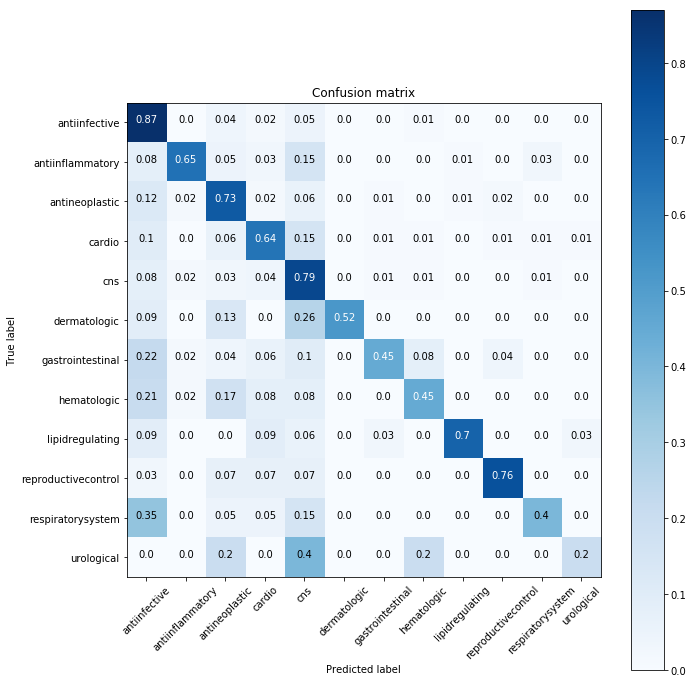

In [14]:
### 12-class confusion matrix
plt.rcParams['figure.figsize'] = [10, 10]   #### make the plot size bigger than the others
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
preds = np.argmax(probs, axis=1)
probs = probs[:,1]
cm = confusion_matrix(y, preds)
adj = cm.transpose()/cm.sum(axis=1)
adj = adj.round(2)
plot_confusion_matrix(adj.transpose(), data.classes)